### Redução de dimensionalidade de imagens

**Importações iniciais**

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import BernoulliRBM
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

**Leitura da base de dados**

In [13]:
base = datasets.load_digits()

In [14]:
features = np.array(base.data, 'float32')
classe = base.target

**Normalização dos dados**

In [15]:
normalizador = MinMaxScaler(feature_range = (0,1))
features = normalizador.fit_transform(features)

**Divisão da base de dados**

In [16]:
features_train, features_test, classe_train, classe_test = train_test_split(features, classe, test_size = 0.2, random_state = 0)

**Construção da RBM**

In [17]:
rbm = BernoulliRBM(random_state = 0)
rbm.n_iter = 25
rbm.n_components = 50
naive_rbm = GaussianNB()
classificador_rbm = Pipeline(steps = [('rbm', rbm), ('naive', naive_rbm)])
classificador_rbm.fit(features_train, classe_train)

Pipeline(memory=None,
     steps=[('rbm', BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=50, n_iter=25,
       random_state=0, verbose=0)), ('naive', GaussianNB(priors=None, var_smoothing=1e-09))])

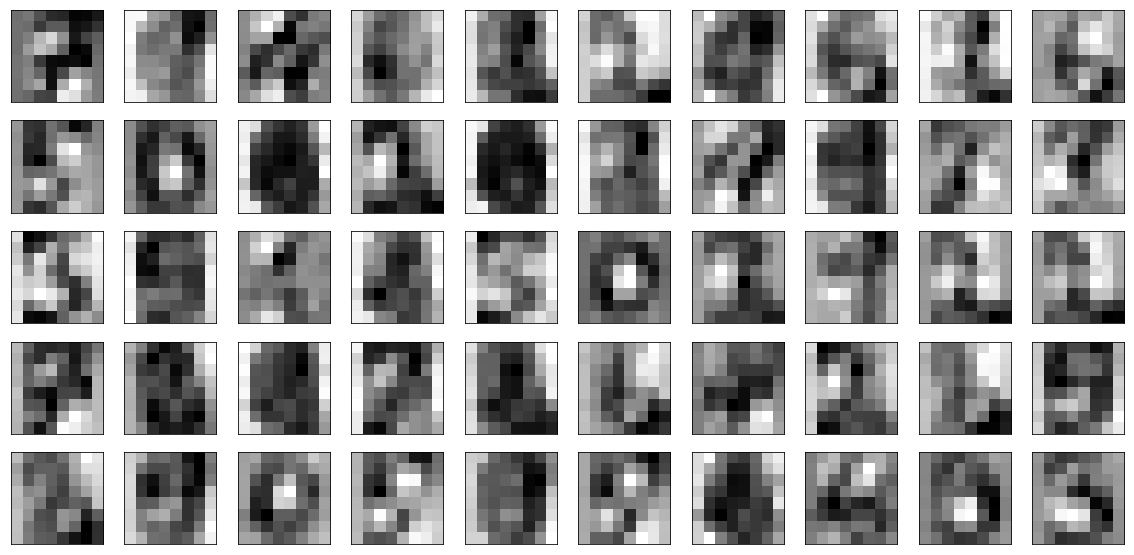

In [18]:
plt.figure(figsize = (20,20))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((8,8)), cmap = plt.cm.gray_r)
    plt.xticks(())
    plt.yticks(())
plt.show()

**Comparativo de resultados com o uso do RBM e sem o uso do mesmo**

In [19]:
previsoes_rbm = classificador_rbm.predict(features_test)

In [20]:
precisao_rbm = metrics.accuracy_score(previsoes_rbm, classe_test)

In [21]:
precisao_rbm

0.8861111111111111

**Utilização do Naive Bayes sem o RBM**

In [22]:
naive = GaussianNB()
naive.fit(features_train, classe_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [24]:
previsoes_naive = naive.predict(features_test)
precisao_naive = metrics.accuracy_score(previsoes_naive, classe_test)

In [25]:
precisao_naive

0.8111111111111111